In [1]:
x <- read.csv("stock_data.csv", header = F)[,2]

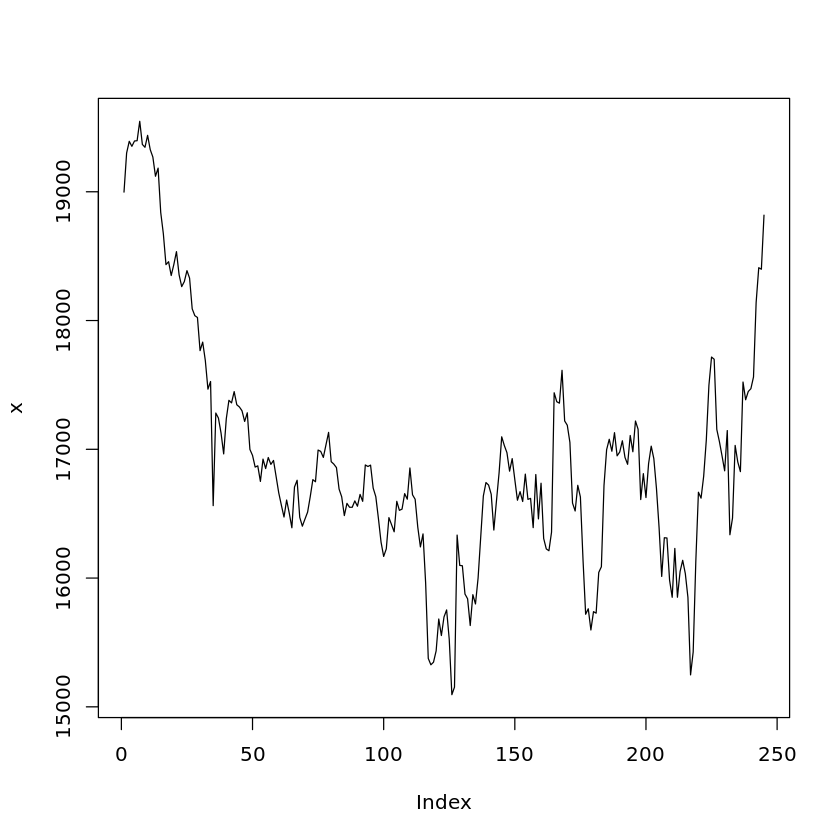

In [2]:
plot(x,type="l")

In [4]:
tTestScore <- function(data,span, v1, v2){
  term <- seq(0, length(data)-span*2, by=span)
  result <- NULL
  tmp <- NULL
  p.val <- NULL
  for (i in term){
    train <- data[(i+1):(span+i)]
    test <- data[(span+i+1):(span*2+i)]
    t <- t.test(train, test, var.equal = F)
    p.val<-c(p.val,t$p.value)
    if (is.nan(t$p.value)){
      tmp <- cbind(test, class=1)
    }else if(t$p.value < v1  && t$p.value > v2 ){
      tmp <- cbind(test, class=2)
    }else{
      tmp <- cbind(test, class=1)
    }
    result <- rbind(result, tmp)
  }
  result <- data.frame(result, p.val)
  
  return(result)
}

In [30]:
obj <- function (param) {
  #define anomaly ratio
  trg_level <- 95
  func_out <- tTestScore(data=x, span = param[3], v1 = param[1], v2 = param[2])
  trg <- 1 - trg_level/100
  a.ratio <- length(which(func_out$class==2)) / length(func_out$class)
  #return residual
  resi <- abs(trg - a.ratio)
  return(resi)
}

In [31]:
ret  <-optim(c(1e-10, 1e-100, 5),
             lower=c(1e-10, 1e-100, 5), upper=c(0.1,0.1,50),
             obj,control = list(maxit = 1000),
method = "L-BFGS-B")

[1] 0.0625


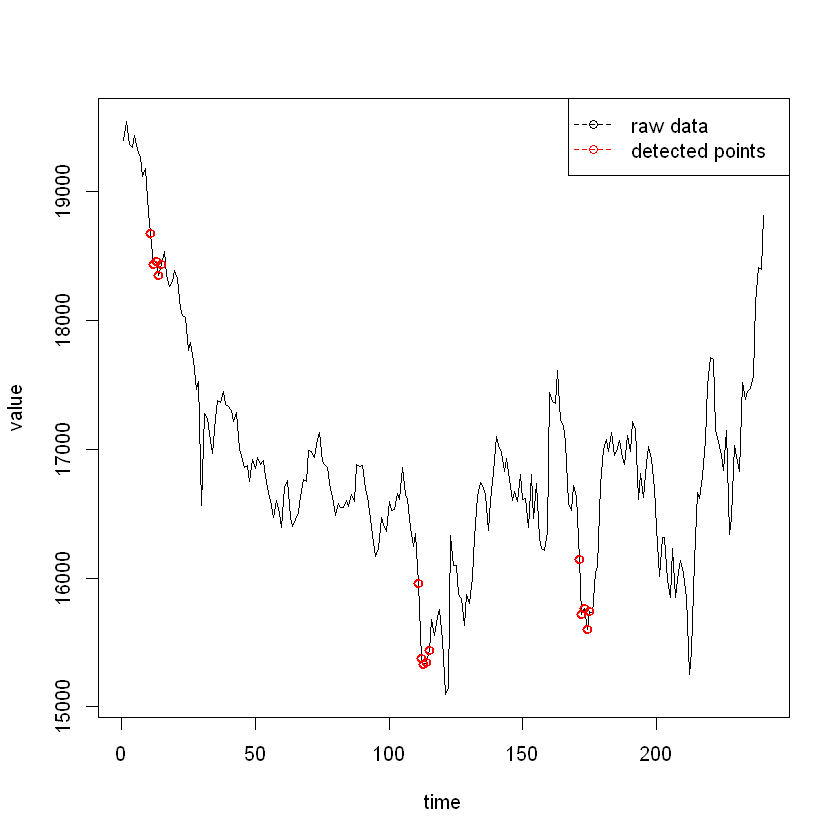

In [34]:
result <- tTestScore(x, ret$par[3], ret$par[1],ret$par[2])
plot(as.numeric(result[,1]), type="l",xlab = "time", ylab = "value")
points(which(result[,2]==2),cex=1,as.numeric(result[,1][which(result[,2]==2)]),col=2,lwd=2)
print(length(which(result$class==2))/length(result$class))
legend("topright", legend = c("raw data","detected points"), col = c("black","red"), pch = 1, lty = 2)